In [ ]:
# Import Libraries
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score, mean_squared_error
from plotly.subplots import make_subplots
# Splitting data into Training and Testing
from sklearn.model_selection import train_test_split
# Model Training
#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
#confusion metrics
from sklearn.metrics import confusion_matrix
import warnings
# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)  # Replace with specific category
warnings.filterwarnings("ignore", category=FutureWarning)  # Common for pandas updates
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)  # For SettingWithCopyWarning

In [108]:
# URL for the dataset's CSV file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv"
# Read the CSV file directly into a Pandas DataFrame
df = pd.read_csv(url)
# Print the first five rows of the dataset
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [109]:
print(f"The shape of industrial dataset:{df.shape}")

The shape of industrial dataset:(10000, 14)


In [110]:
print(f"column of data set:{df.columns}")

column of data set:Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [112]:
df.isnull().any()

UDI                        False
Product ID                 False
Type                       False
Air temperature [K]        False
Process temperature [K]    False
Rotational speed [rpm]     False
Torque [Nm]                False
Tool wear [min]            False
Machine failure            False
TWF                        False
HDF                        False
PWF                        False
OSF                        False
RNF                        False
dtype: bool

In [113]:
df.duplicated().any()

False

In [67]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [114]:
df.nunique().count

<bound method Series.count of UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Machine failure                2
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64>

Step 2 - EDA

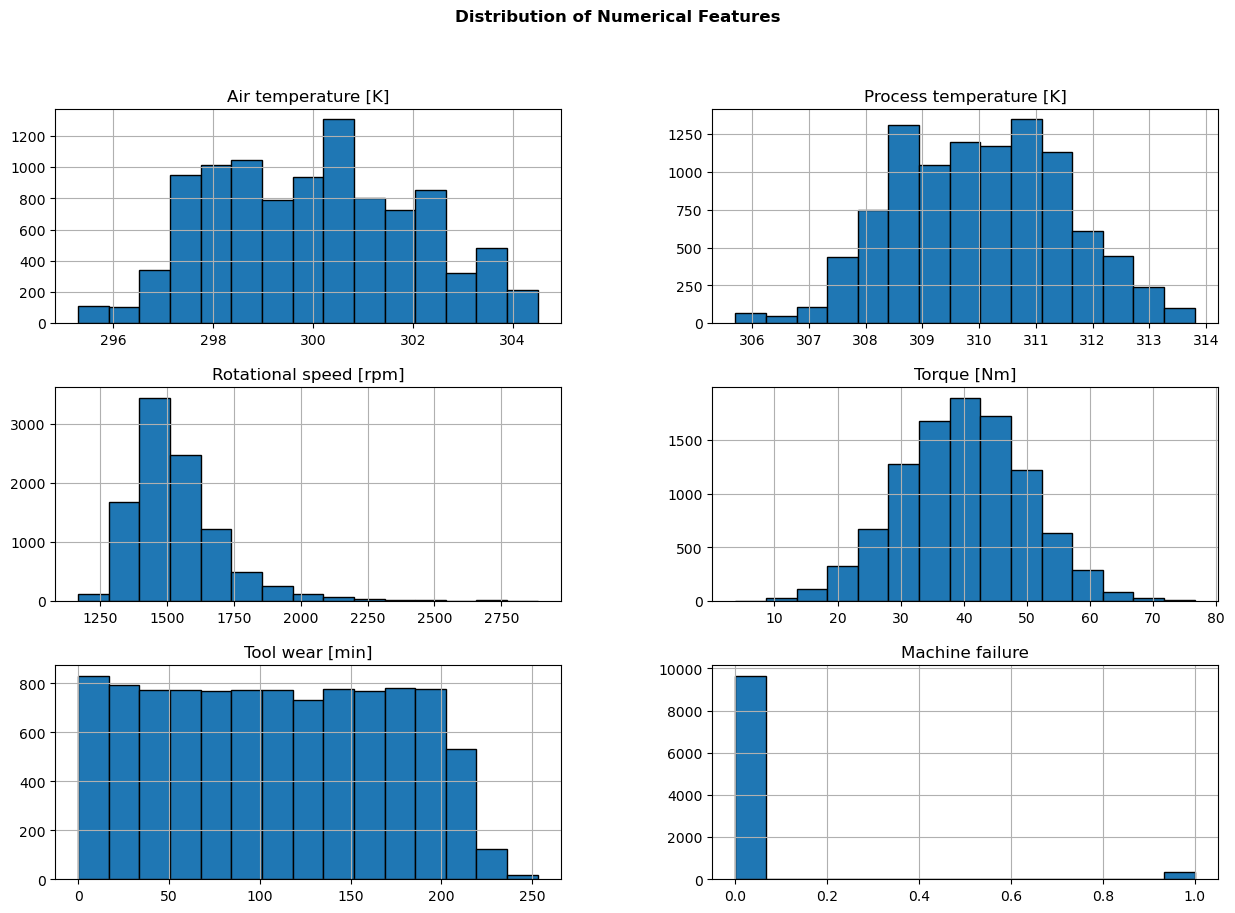

In [87]:
import matplotlib.pyplot as plt

df.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontweight = "bold")
plt.show()

In [115]:
import plotly.express as px

# Assuming the dataframe `df` is already defined and contains a 'Machine failure' column
# Generate a scatter matrix using Plotly Express for visualization
fig = px.scatter_matrix(
    df,
    dimensions=df.select_dtypes(include=['float64', 'int64']).columns,  # Select numerical columns
    color="Machine failure",
    title="Pairwise Distribution of Features Colored by Machine Failure",
    labels={"Machine failure": "Failure Status"},
    color_continuous_scale=px.colors.sequential.Viridis,
    height=1000
)

fig.update_traces(diagonal_visible=False)  # Hide histograms on the diagonal if necessary
fig.show()


In [116]:
# Visualizing the target variable distribution

# Create a pie chart for 'Type' variable using Plotly
pie_fig = px.pie(
    df,
    names='Type',
    title="Type Variable Distribution (Pie Chart)",
    color='Type',
    color_discrete_sequence=['lightblue', 'red', 'brown'],
    hole=0.3,
    height=500,
    width=500
)
pie_fig.update_traces(textinfo='percent+label', pull=[0, 0.1, 0.2], showlegend=True)
pie_fig.show()


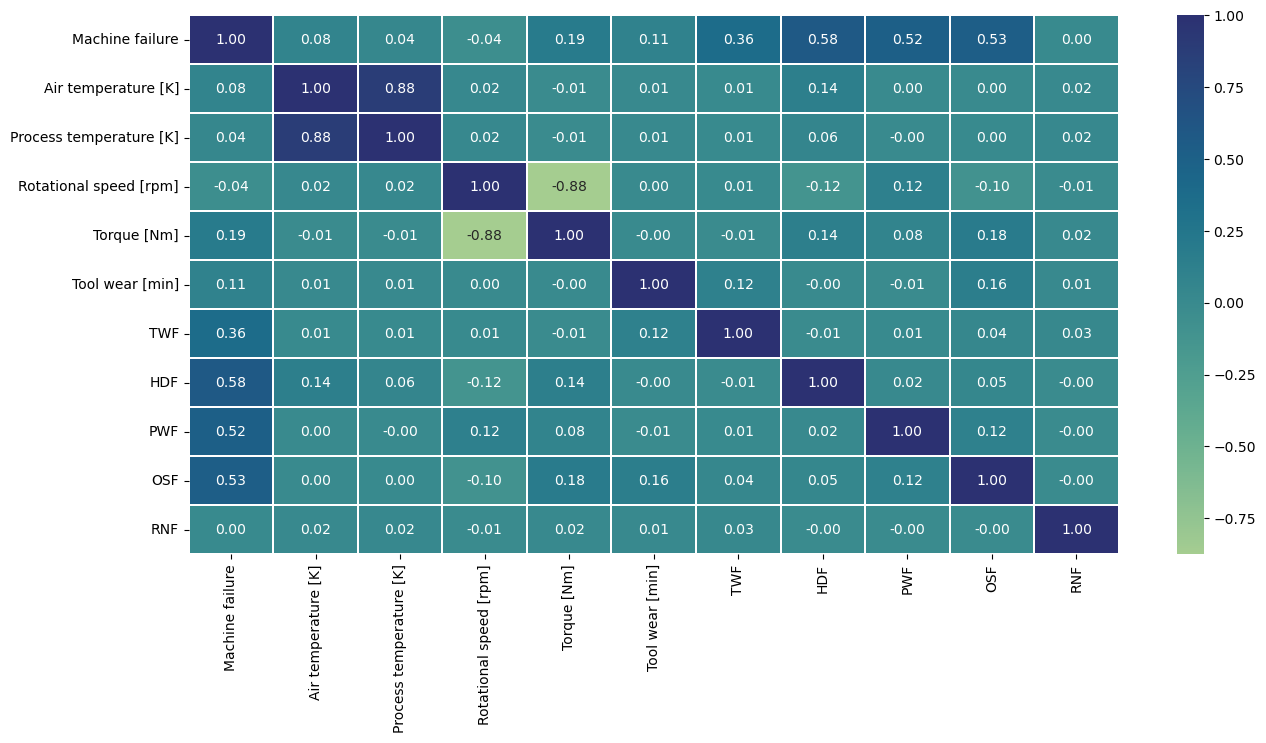

In [121]:
import seaborn as sns
# List of columns to include in the correlation matrix
columns = ['Machine failure', 'Air temperature [K]', 'Process temperature [K]', 
           'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 
           'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Subset the DataFrame to include only the desired columns
df_subset = df[columns]

# Compute the correlation matrix
corr_matrix = df_subset.corr()

# Plot the heatmap
plt.figure(figsize=(15, 7))  # Set the size of the figure
sns.heatmap(corr_matrix, annot=True, cmap='crest', fmt='.2f', linewidths=0.2)
plt.show()

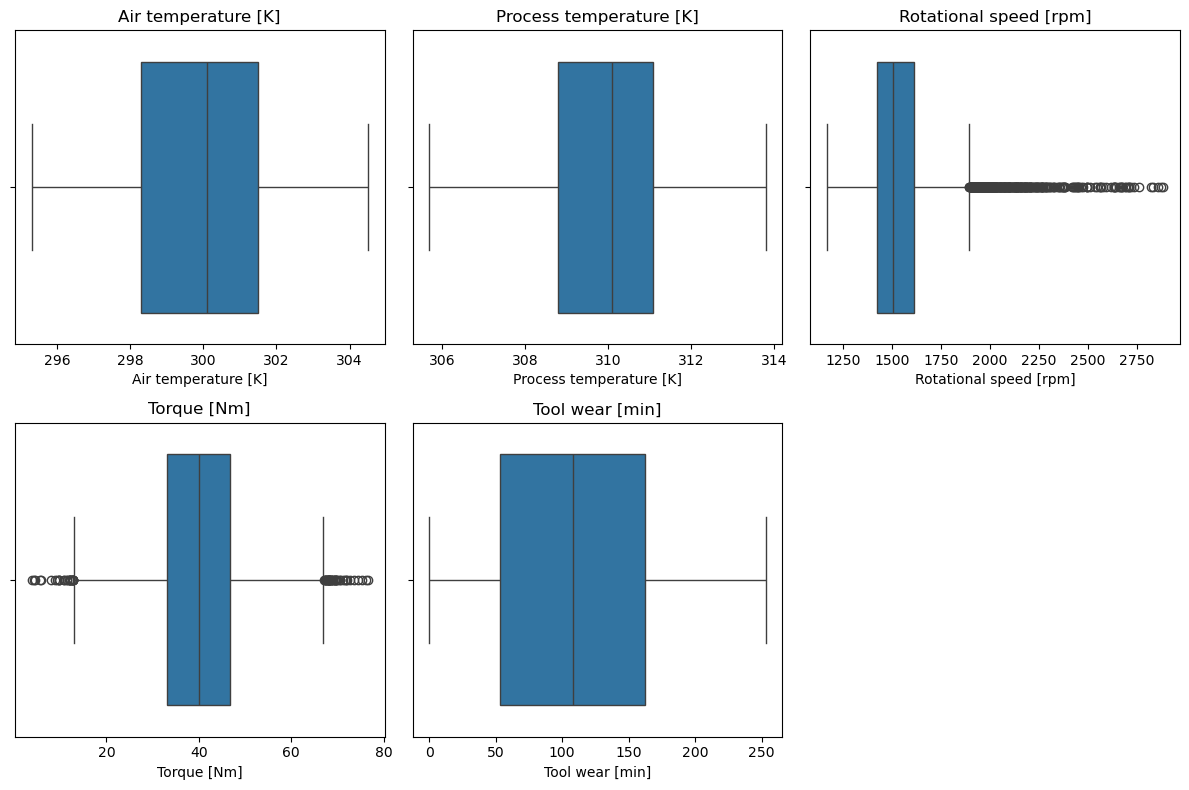

In [74]:
num_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

plt.figure(figsize=(12, 8))
for i, nf in enumerate(num_features, start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(x = df[nf])
    plt.title(nf)

plt.tight_layout()
plt.show()

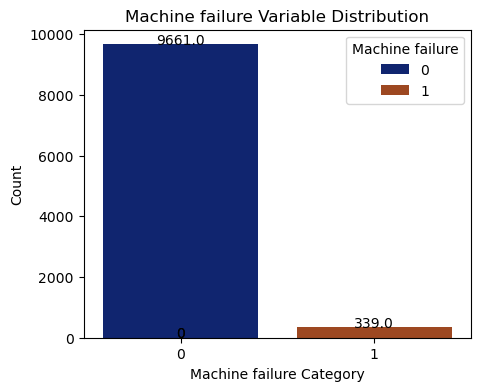

In [75]:
# Create the plot
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='Machine failure', data=df, palette='dark', hue='Machine failure')

# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black')

# Customize the plot
plt.title("Machine failure Variable Distribution")
plt.xlabel("Machine failure Category")
plt.ylabel("Count")
plt.show()

In [76]:
df.drop(['UDI', 'Product ID', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)

In [58]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0
9996,H,298.9,308.4,1632,31.8,17,0
9997,M,299.0,308.6,1645,33.4,22,0
9998,H,299.0,308.7,1408,48.5,25,0


<Axes: >

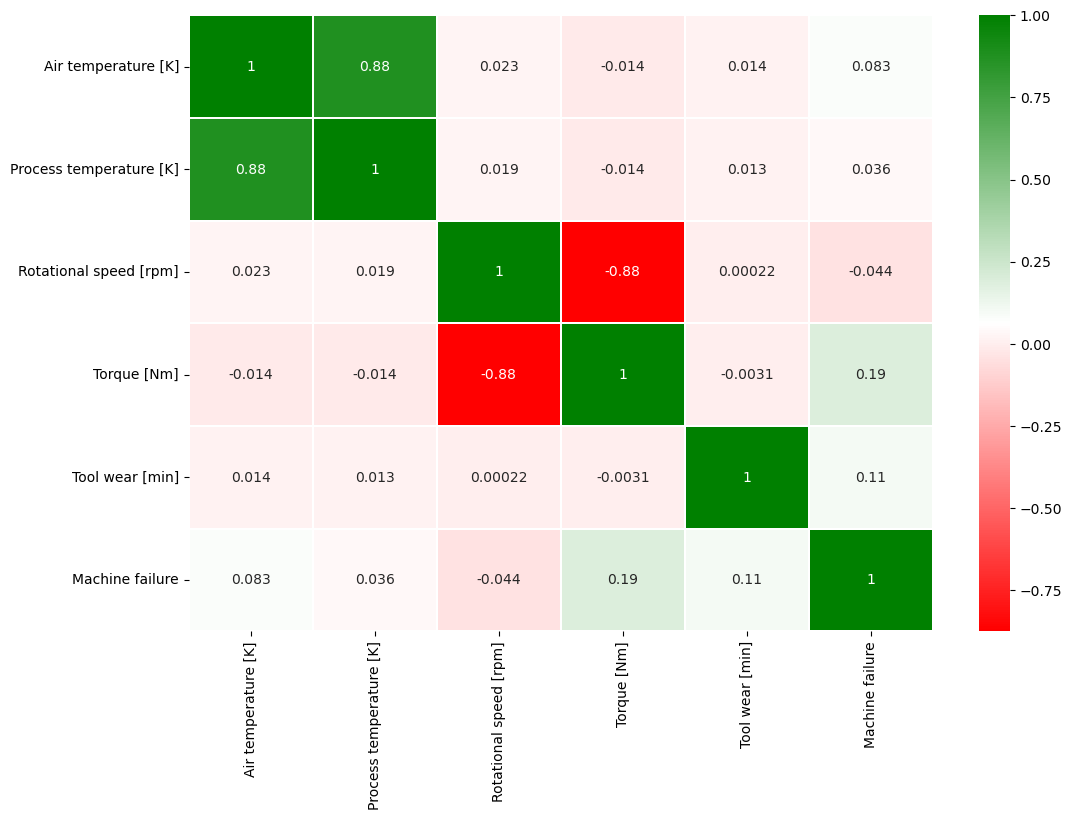

In [77]:
# Compute the correlation matrix
from matplotlib.colors import LinearSegmentedColormap

corr_matrix = df.iloc[:, 1:7].corr()

cmap = LinearSegmentedColormap.from_list(
    name='test', 
    colors=['red','white','green'])

fig, ax = plt.subplots(figsize=(12,8)) 

sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns, 
           cmap=cmap, annot=True,
           linewidths=0.2,
           ax=ax)

In [78]:
df_new = df.drop(['Process temperature [K]', 'Rotational speed [rpm]'], axis=1)

In [79]:
df_new

,Type,Air temperature [K],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,42.8,0,0
1,L,298.2,46.3,3,0
2,L,298.1,49.4,5,0
3,L,298.2,39.5,7,0
4,L,298.2,40.0,9,0
...,...,...,...,...,...
9995,M,298.8,29.5,14,0
9996,H,298.9,31.8,17,0
9997,M,299.0,33.4,22,0
9998,H,299.0,48.5,25,0


<Axes: >

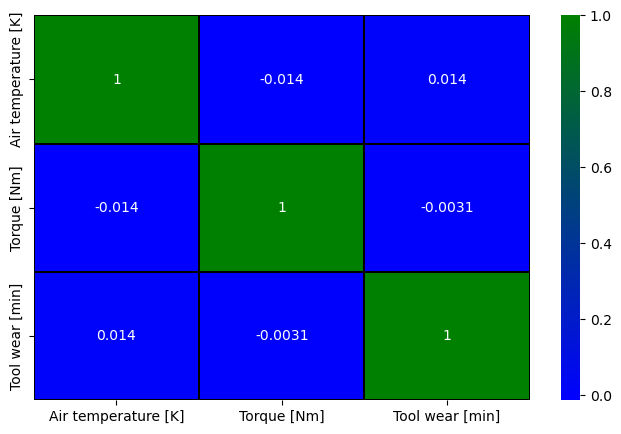

In [80]:
corr_matrix = df_new.iloc[:, 1:4].corr()

cmap = LinearSegmentedColormap.from_list(
    name='test', 
    colors=['blue','green'])

fig, ax = plt.subplots(figsize=(8,5)) 

sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns, 
           cmap=cmap, annot=True,
           linewidths=0.2,
           linecolor='black',
           ax=ax)

In [38]:
# Target feature distribution
print(df_new['Machine failure'].value_counts())


print("NOTE: Number of counts of target data points in the two classes '0' and '1' are very different so, this led to overfitting in our outcome.")

Machine failure
0    9661
1     339
Name: count, dtype: int64
NOTE: Number of counts of target data points in the two classes '0' and '1' are very different so, this led to overfitting in our outcome.


Step 3 - Data Pre-processing

In [39]:
print(df_new.columns)

Index(['Type', 'Air temperature [K]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure'],
      dtype='object')


In [ ]:
# Convert categorical variables to numerical using one-hot encoding
labelencoder_X_1 = LabelEncoder()
df_new.iloc[:, 0] = labelencoder_X_1.fit_transform(df_new.iloc[:, 0])
#df = pd.get_dummies(df, columns=["Type"], drop_first=True)

In [41]:
df_new[:5]

,Type,Air temperature [K],Torque [Nm],Tool wear [min],Machine failure
0,2,298.1,42.8,0,0
1,1,298.2,46.3,3,0
2,1,298.1,49.4,5,0
3,1,298.2,39.5,7,0
4,1,298.2,40.0,9,0


In [42]:
# Drop unnecessary feature
X = df_new.drop(columns=['Machine failure'])

# Segregated target feature
y = df_new['Machine failure']

In [83]:
X[:5]

,Type,Air temperature [K],Torque [Nm],Tool wear [min]
0,2,298.1,42.8,0
1,1,298.2,46.3,3
2,1,298.1,49.4,5
3,1,298.2,39.5,7
4,1,298.2,40.0,9


As traget data(Mchine failure) is highly imbalance so to balance data, performing Oversampling-SMOTE technique.

In [ ]:
# Initialize SMOTE
smote = SMOTE(random_state = 100)

# Applying oversampling
X_smote, y_smote = smote.fit_resample(X, y)

# Combine oversampled data into a DataFrame
df_resampled = pd.concat([pd.DataFrame(X_smote, columns=X.columns), 
                          pd.DataFrame(y_smote, columns=['Machine failure'])], axis=1)

# Check the class distribution after oversampling
print("Class distribution after oversampling - SMOTE:")
print(df_resampled['Machine failure'].value_counts())

Class distribution after oversampling - SMOTE:
Machine failure
0    9661
1    9661
Name: count, dtype: int64


In [ ]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=100)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13525, 4), (13525,), (5797, 4), (5797,))

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
X_train[:5]

array([[-2.25380127, -1.61068264, -0.05744269,  0.12707155],
       [ 1.55301145,  1.31497991,  0.20362677,  1.2622666 ],
       [-0.1169571 ,  0.91165779,  0.57130784,  0.48182   ],
       [-0.35039491, -0.12417967,  0.50696789,  1.50349555],
       [ 1.55301145, -0.17652437, -0.0433359 , -1.50477133]])

In [48]:
X_test[:5]

array([[-2.25380127, -0.84238357,  0.22469323,  0.5527697 ],
       [-0.35039491,  0.38689496, -0.37484561, -1.49058139],
       [ 1.55301145, -0.80954505,  1.66525337, -0.21348696],
       [ 1.55301145,  0.89909434,  0.56325635, -1.26354238],
       [-0.35039491, -0.58157364,  0.7204358 ,  1.1487471 ]])

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

from sklearn.metrics import roc_auc_score

def model_performance_classification(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  
    recall = recall_score(target, pred) 
    precision = precision_score(target, pred)  
    f1 = f1_score(target, pred) 
    auc = roc_auc_score(target, pred)  # Area Under the ROC Curve (AUC-ROC)

    # creating a dataframe of metrics
    df_performance = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1, "AUC-ROC": auc},
        index=[0]
    )
    return df_performance

Model Building - (Decision Tree Classifier)

In [50]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=100)

# Train the model
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [51]:
# Performance on train data
DTC_performance = model_performance_classification(dt_classifier, X_train, y_train)
DTC_performance

,Accuracy,Recall,Precision,F1,AUC-ROC
0,1.0,1.0,1.0,1.0,1.0


In [52]:
# Performance on test data
DTC_performance = model_performance_classification(dt_classifier, X_test, y_test)
DTC_performance

,Accuracy,Recall,Precision,F1,AUC-ROC
0,0.957219,0.963445,0.950087,0.956719,0.957332


In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

import warnings
warnings.filterwarnings('ignore')

# Define the scorer with recall as the metric to optimize
scorer = make_scorer(recall_score)


    # Define hyperparameters to tune
parameters = {
    'max_depth': [3, 5, 7,9,11, 13, 15],
    'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13],
    "max_features": ["auto", "sqrt", "log2", None],
    'criterion': ['gini', 'entropy']
}


# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=parameters, scoring=scorer, cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
tuned_dtc = grid_search.best_estimator_
# Fit the best algorithm to the data.
tuned_dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=100)

In [54]:
# performance on train data
model_performance_classification(tuned_dtc, X_train, y_train)

,Accuracy,Recall,Precision,F1,AUC-ROC
0,0.986322,0.998973,0.974524,0.986597,0.986221


In [55]:
# performance on test data
model_performance_classification(tuned_dtc, X_test, y_test)

,Accuracy,Recall,Precision,F1,AUC-ROC
0,0.959117,0.976098,0.942634,0.959074,0.959425


Confusion Matrix:
[[2783  169]
 [  68 2777]]


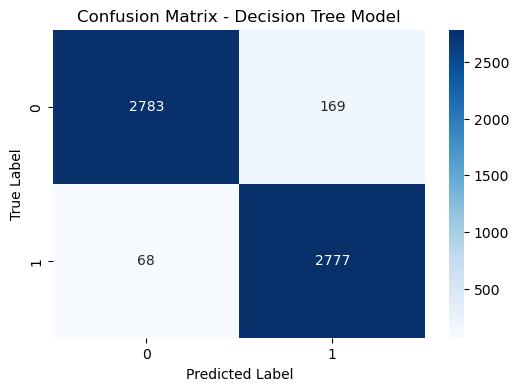

In [150]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = tuned_dtc.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix (optional)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues") 
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree Model")
plt.show()

In [56]:
importance = tuned_dtc.feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

               Feature  Importance
2          Torque [Nm]    0.464603
3      Tool wear [min]    0.254541
1  Air temperature [K]    0.189046
0                 Type    0.091809
